In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression
import tensorflow as tf

In [2]:
# Import our input dataset
salary_df = pd.read_csv('C:/Users/User/Documents/Data_Bootcamp/Project_4/Excel/ds_salaries.csv')
salary_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
salary_df.drop(salary_df[["salary", "salary_currency"]], axis = 1, inplace=True)
salary_df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M


In [4]:
 # Check the number of unique values in each column
salary_df.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [5]:
salary_df["job_title"].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

In [6]:
engineer = '.*Engineer'
salary_df[salary_df['job_title'].str.contains(engineer)]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
21,2023,SE,FT,Research Engineer,275000,DE,0,DE,M
22,2023,SE,FT,Research Engineer,174000,DE,0,DE,M
23,2023,SE,FT,Analytics Engineer,230000,GB,100,GB,M
...,...,...,...,...,...,...,...,...,...
3723,2021,SE,FT,Computer Vision Engineer,18907,BR,0,BR,M
3739,2021,MI,FT,Data Engineer,45391,NL,100,NL,L
3743,2020,MI,FT,Data Engineer,130800,ES,100,US,M
3744,2020,SE,FT,Machine Learning Engineer,45618,HR,100,HR,S


In [7]:
analyst = '.*Analyst'
salary_df[salary_df['job_title'].str.contains(analyst)]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
11,2023,SE,FT,Data Analyst,130000,US,100,US,M
12,2023,SE,FT,Data Analyst,100000,US,100,US,M
19,2023,MI,FT,Data Analyst,150000,US,100,US,M
20,2023,MI,FT,Data Analyst,110000,US,100,US,M
37,2023,MI,FT,Data Analyst,105380,US,0,US,M
...,...,...,...,...,...,...,...,...,...
3724,2021,EN,FT,Business Data Analyst,59102,LU,100,LU,L
3734,2021,MI,FT,Lead Data Analyst,19609,IN,100,IN,L
3736,2021,MI,FT,Data Analyst,75000,US,0,US,L
3737,2021,MI,FT,Data Analyst,62000,US,0,US,L


In [8]:
scientist = '.*Scientist'
salary_df[salary_df['job_title'].str.contains(scientist)]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,US,0,US,L
...,...,...,...,...,...,...,...,...,...
3746,2021,MI,FT,Data Scientist,119059,SG,100,IL,M
3747,2021,MI,FT,Applied Machine Learning Scientist,423000,US,50,US,L
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L


In [9]:
engineer = 'Engineer'
analyst = 'Analyst'
scientist = 'Scientist'

for idx, x in enumerate(salary_df["job_title"]):
    if engineer in x:
        salary_df.at[idx, "job_title"] = "Data Engineer"
    elif analyst in x:
        salary_df.at[idx, "job_title"] = "Data Analyst"
    elif scientist in x:
        salary_df.at[idx, "job_title"] = "Data Scientist"
    else:
        salary_df.at[idx, "job_title"] = "Other"
salary_df["job_title"]

0       Data Scientist
1        Data Engineer
2        Data Engineer
3       Data Scientist
4       Data Scientist
             ...      
3750    Data Scientist
3751    Data Scientist
3752    Data Scientist
3753      Data Analyst
3754             Other
Name: job_title, Length: 3755, dtype: object

In [10]:
salary_df["job_title"].value_counts()

job_title
Data Engineer     1640
Data Scientist    1065
Data Analyst       684
Other              366
Name: count, dtype: int64

In [11]:
salary_df["employee_residence"].value_counts()

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: count, Length: 78, dtype: int64

In [12]:
US = "US"
for idx, x in enumerate(salary_df["employee_residence"]):
    if US in x:
        salary_df.at[idx, "employee_residence"] = "US"
    else:
        salary_df.at[idx, "employee_residence"] = "Other"
salary_df["employee_residence"].head()

0    Other
1       US
2       US
3    Other
4    Other
Name: employee_residence, dtype: object

In [13]:
salary_df["employee_residence"].value_counts()

employee_residence
US       3004
Other     751
Name: count, dtype: int64

In [14]:
salary_df["company_location"].value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

In [15]:
for idx, x in enumerate(salary_df["company_location"]):
    if US in x:
        salary_df.at[idx, "company_location"] = "US"
    else:
        salary_df.at[idx, "company_location"] = "Other"
salary_df["company_location"].head()

0    Other
1       US
2       US
3    Other
4    Other
Name: company_location, dtype: object

In [16]:
salary_df["company_location"].value_counts()

company_location
US       3040
Other     715
Name: count, dtype: int64

In [17]:
salary_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [18]:
salary_df["remote_ratio"] = salary_df["remote_ratio"].astype(str)
salary_df['work_year'] = salary_df['work_year'].astype(int)

salary_df.dtypes

work_year              int32
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

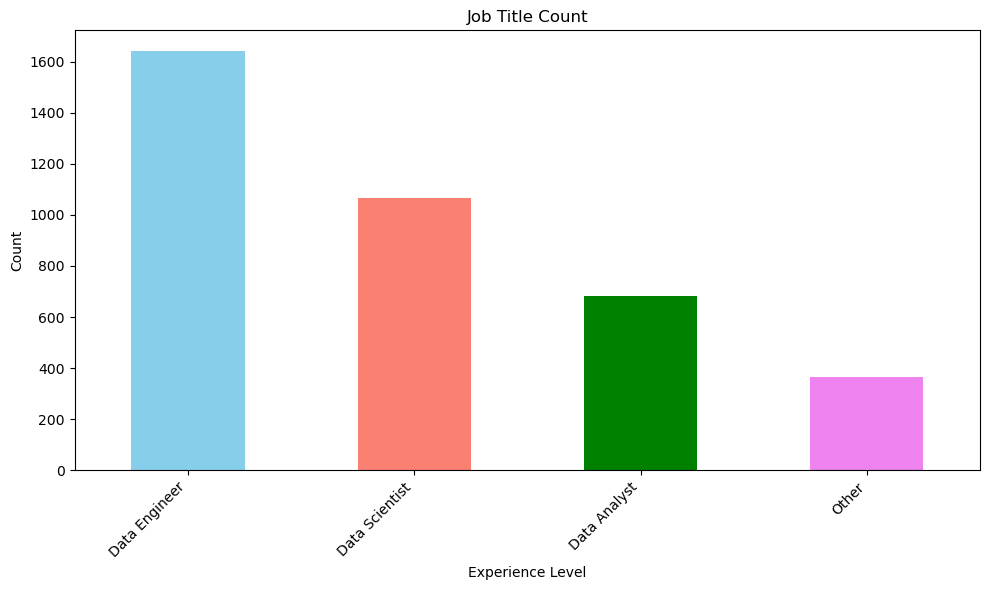

In [19]:
import matplotlib.pyplot as plt

# Count the occurrences of each experience level
experience_level_counts = salary_df['job_title'].value_counts()

# Define colors for each job title
colors = ['skyblue', 'salmon', 'green', 'violet']

# Plotting the bar chart with specified colors
experience_level_counts.plot(kind='bar', color=colors, figsize=(10, 6))

# Adding labels and title
plt.title('Job Title Count')
plt.xlabel('Experience Level')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

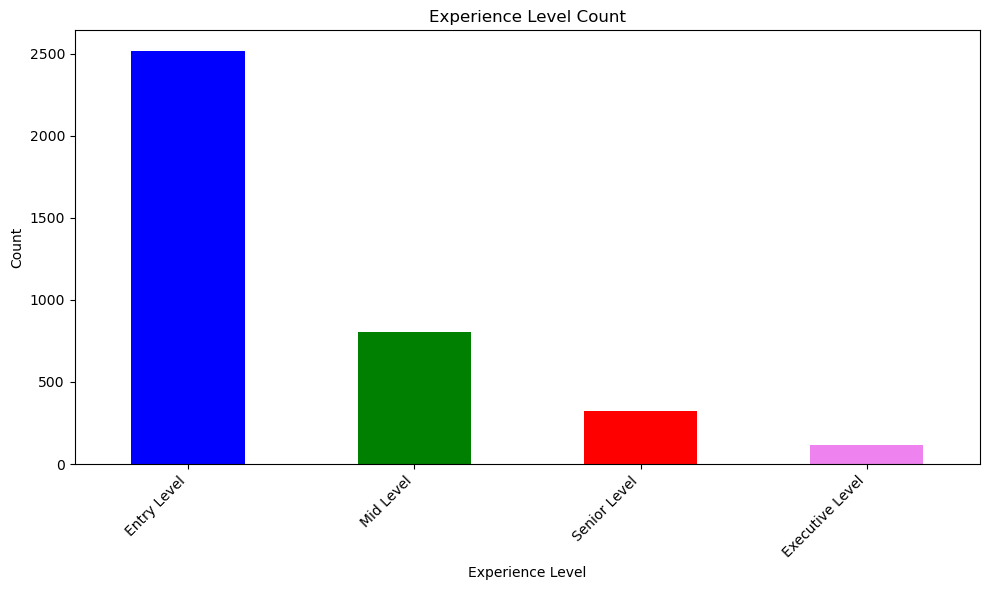

In [20]:
# Count the occurrences of each experience level
experience_level_counts = salary_df['experience_level'].value_counts()

# Define colors for each job title
colors = ['blue', 'green', 'red', 'violet']

# Plotting the bar chart with specified colors
experience_level_counts.plot(kind='bar', color=colors, figsize=(10, 6))

# Adding labels and title
plt.title('Experience Level Count')
plt.xlabel('Experience Level')
plt.ylabel('Count')

# Show the plot
custom_labels = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
plt.xticks(range(len(experience_level_counts)), custom_labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

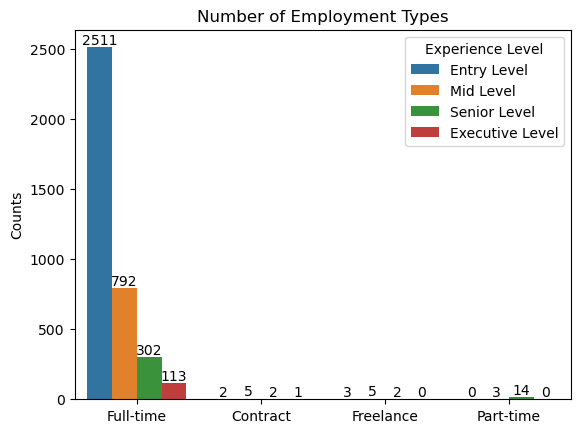

In [21]:
# Count of employment type by experience

import seaborn as sns

fig, ax = plt.subplots()
sns.countplot(ax = ax, data = salary_df, x = salary_df.employment_type, hue = 'experience_level')
ax.set(xlabel='', ylabel='Counts', title='Number of Employment Types')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
custom_labels_axis = ['Full-time', 'Contract', 'Freelance', 'Part-time']
ax.xaxis.set_ticklabels(custom_labels_axis)
custom_labels_legend = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
ax.legend(title='Experience Level', labels=custom_labels_legend)

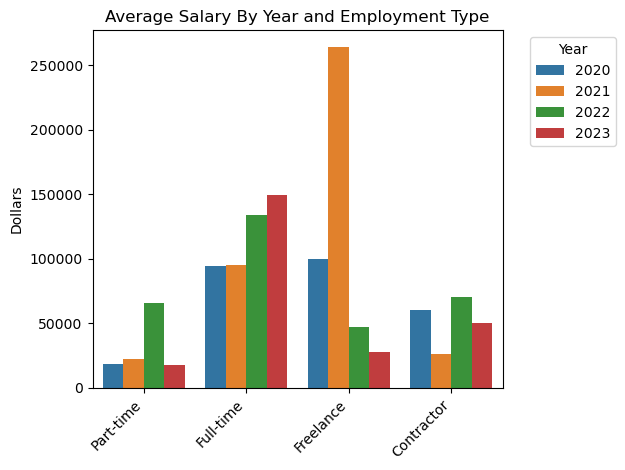

In [22]:
# Calculate average salaries and sort by descending order
avg_salaries = salary_df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending=False).reset_index()

# Sort the salary_df by work_year
salary_df = salary_df.sort_values(by='work_year')

# Plotting
fig, ax = plt.subplots()
sns.barplot(ax=ax, data=salary_df, x='employment_type', y='salary_in_usd', hue='work_year', errorbar=None)
ax.set(xlabel='', ylabel='Dollars', title='Average Salary By Year and Employment Type')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
custom_labels = ['Part-time', 'Full-time', 'Freelance', 'Contractor']
ax.xaxis.set_ticklabels(custom_labels)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

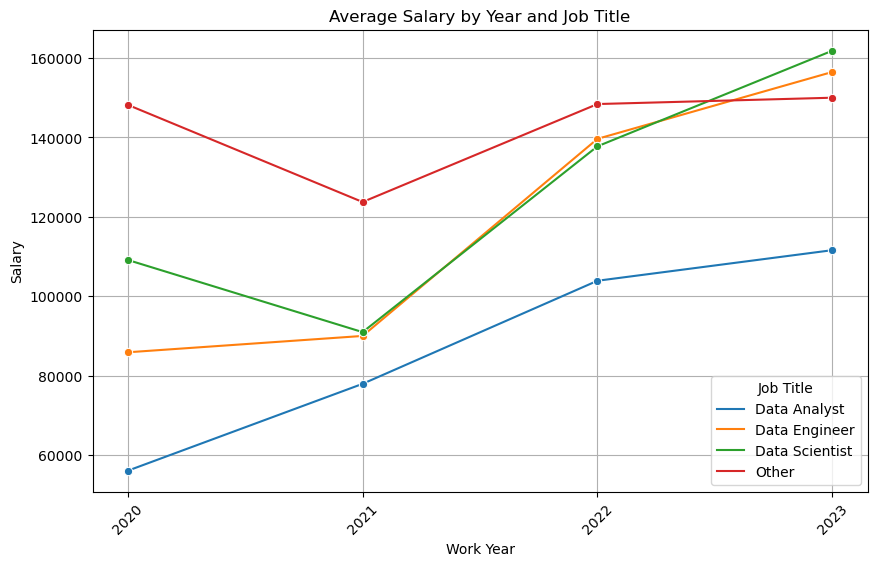

In [23]:
import matplotlib.ticker as ticker

salary_df = salary_df.dropna(subset=['work_year'])
year_job_salary = salary_df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()

# Filter only the desired work years
desired_years = [2020, 2021, 2022, 2023]
year_job_salary = year_job_salary[year_job_salary['work_year'].isin(desired_years)]

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data=year_job_salary, x='work_year', y='salary_in_usd', hue='job_title', marker='o')

# Adding labels and title
plt.title("Average Salary by Year and Job Title")
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.legend(title='Job Title')
plt.xticks(rotation=45)

# Format x-axis ticks to show only integer part
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.grid(True)
plt.show()

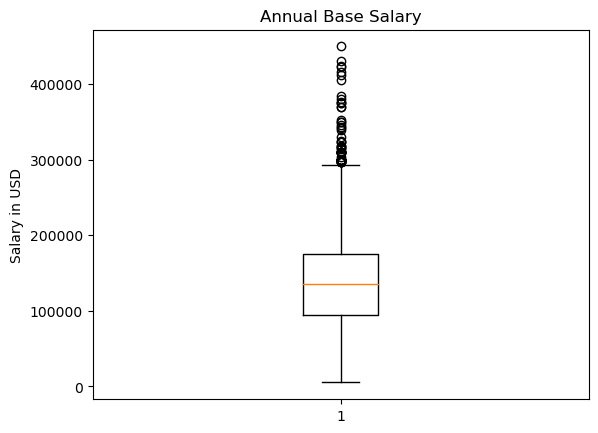

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('Annual Base Salary')
ax1.set_ylabel('Salary in USD')
ax1.boxplot(salary_df["salary_in_usd"])
plt.show()

In [25]:
salary_df = salary_df[(salary_df['employee_residence'] == 'US')]
salary_df = salary_df[(salary_df['employment_type'] == 'FT')]

salary_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3549,2020,EN,FT,Data Engineer,138000,US,100,US,S
3600,2020,EN,FT,Data Analyst,91000,US,100,US,L
3691,2020,MI,FT,Data Analyst,98000,US,0,US,M
3545,2020,EN,FT,Data Engineer,250000,US,50,US,L
3642,2020,SE,FT,Data Scientist,190000,US,100,US,S
...,...,...,...,...,...,...,...,...,...
1210,2023,SE,FT,Data Engineer,90700,US,0,US,M
1211,2023,SE,FT,Data Engineer,230000,US,0,US,M
1212,2023,SE,FT,Data Engineer,170000,US,0,US,M
1213,2023,SE,FT,Data Analyst,227000,US,0,US,M


In [26]:
salary_df = salary_df[salary_df['salary_in_usd'] >= 50000]
salary_df = salary_df[salary_df['salary_in_usd'] < 300000]

salary_df = salary_df[salary_df['work_year'] >= 2022]


In [27]:
num_rows = salary_df.shape[0]
print(f"The number of rows in the DataFrame is: {num_rows}")

The number of rows in the DataFrame is: 2829


In [28]:
mean_salary = salary_df['salary_in_usd'].mean()
median_salary = salary_df['salary_in_usd'].median()

print(f"Mean Salary: {mean_salary:.2f}")
print(f"Median Salary: {median_salary:.2f}")

Mean Salary: 150824.88
Median Salary: 145000.00


In [29]:
salary_df.columns = salary_df.columns.str.strip()

# Now try dropping the columns again
columns_to_drop = ["employee_residence", "company_location"]
salary_df = salary_df.drop(columns=columns_to_drop)

In [30]:
#Build Nueral Network

salary_with_dummies = pd.get_dummies(salary_df, columns=['work_year', 'experience_level', 'employment_type', 'job_title', 'remote_ratio',  'company_size'], dtype=int)

print(salary_with_dummies.head())
salary_with_dummies.dtypes

      salary_in_usd  work_year_2022  work_year_2023  experience_level_EN  \
2417         182500               1               0                    0   
2408         243900               1               0                    0   
2413          79000               1               0                    0   
2412         109000               1               0                    0   
2409         156600               1               0                    0   

      experience_level_EX  experience_level_MI  experience_level_SE  \
2417                    0                    0                    1   
2408                    0                    0                    1   
2413                    0                    1                    0   
2412                    0                    1                    0   
2409                    0                    0                    1   

      employment_type_FT  job_title_Data Analyst  job_title_Data Engineer  \
2417                   1               

salary_in_usd               int64
work_year_2022              int32
work_year_2023              int32
experience_level_EN         int32
experience_level_EX         int32
experience_level_MI         int32
experience_level_SE         int32
employment_type_FT          int32
job_title_Data Analyst      int32
job_title_Data Engineer     int32
job_title_Data Scientist    int32
job_title_Other             int32
remote_ratio_0              int32
remote_ratio_100            int32
remote_ratio_50             int32
company_size_L              int32
company_size_M              int32
company_size_S              int32
dtype: object

In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split our preprocessed data into our features and target arrays
y = salary_with_dummies['salary_in_usd']
X = salary_with_dummies.drop(columns=['salary_in_usd'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [33]:
# Train a RandomForestRegressor as an example model
model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)

# User input for job title
user_job_title = input("Enter the job title: ")

Enter the job title: Data Engineer


In [34]:
# Create a DataFrame with the user input for job title
user_data = pd.DataFrame({'job_title': [user_job_title]})

In [35]:
# Perform one-hot encoding on the user data
encoder = OneHotEncoder(handle_unknown='ignore')
user_data_encoded = pd.DataFrame(encoder.fit_transform(user_data[['job_title']]).toarray(), columns=encoder.get_feature_names_out(['job_title']))

# Create a DataFrame to store the user input features
user_input_features_df = pd.DataFrame(index=[0], columns=X.columns)
user_input_features_df = user_input_features_df.fillna(0)
user_input_features_df.update(user_data_encoded)

In [36]:
# Make predictions using the trained model
user_predictions = model.predict(user_input_features_df)

# Print the predicted salary
print(f'Predicted Salary for {user_job_title}: ${user_predictions[0]:,.2f}')

Predicted Salary for Data Engineer: $162,305.84


In [41]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test set

test_predictions = model.predict(X_test)

# Calculate the Mean Absolute Percentage Error (MAPE)

mae_test = mean_absolute_error(y_test, test_predictions)
mape_test_percentage = mean_absolute_error(y_test, test_predictions) / (y_test.mean() / 100)

# Print the Mean Absolute Percentage Error on the test set
print(f'Mean Absolute Error on Test Set: ${mae_test:.2f}')
print(f'Mean Absolute Percentage Error on Test Set: {mape_test_percentage:.2f}%')

Mean Absolute Error on Test Set: $36881.37
Mean Absolute Percentage Error on Test Set: 23.98%


In [38]:
user_job_title = user_data['job_title'].iloc[0]

# Filter the dataset for the specified job title
selected_job_data = salary_with_dummies[salary_with_dummies[f'job_title_{user_job_title}'] == 1]

# Calculate the median and mean of the selected job title
median_salary_actual = selected_job_data['salary_in_usd'].median()
mean_salary_actual = selected_job_data['salary_in_usd'].mean()

# Print the actual median and mean
print(f'Actual Median Salary for {user_job_title}: ${median_salary_actual:.2f}')
print(f'Actual Mean Salary for {user_job_title}: ${mean_salary_actual:.2f}')

Actual Median Salary for Data Engineer: $150000.00
Actual Mean Salary for Data Engineer: $156275.99
